In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Display the row's columns and data in dictionary format (Measurement)
first_row_m = session.query(Measurement).first()
first_row_m.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x28fd2bbefe0>,
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01'}

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

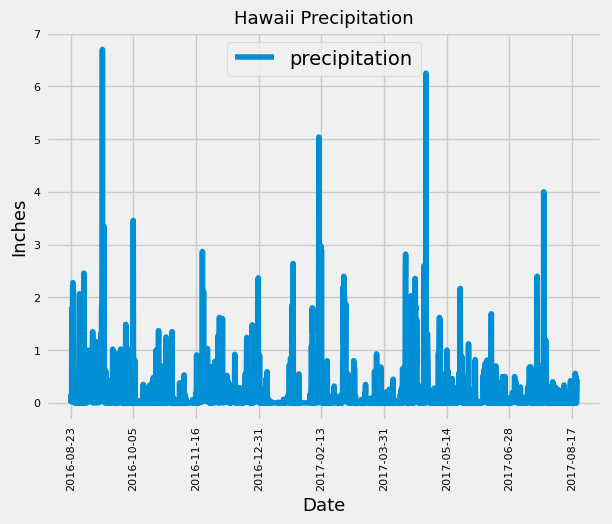

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_twelve_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#last_twelve_months

last_date = dt.date(last_twelve_months.year, last_twelve_months.month, last_twelve_months.day)

# Perform a query to retrieve the data and precipitation scores
prcp_results = session.query(Measurement.date, Measurement.prcp).\
       filter(Measurement.date >= last_date).order_by(Measurement.date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(prcp_results, columns=['date', 'precipitation'])

# Drop any N/A values
df_clean = df.dropna()

# Sort the dataframe by date
df_clean.sort_index(inplace=True)
df_clean.head()

# Use Pandas Plotting with Matplotlib to plot the data
df_clean.plot('date', 'precipitation')
plt.xlabel("Date",  size = 13)
plt.ylabel("Inches", size = 13)
plt.title("Hawaii Precipitation", size = 13)
plt.legend(["precipitation"],loc='upper center')
plt.xticks(rotation=90, size=8)
plt.yticks(size = 8)
plt.show()


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_clean.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Display the row's columns and data in dictionary format (Station)
first_row_s = session.query(Station).first()
first_row_s.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x28fce01bdf0>,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0}

In [14]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = session.query(func.min(Measurement.tobs), 
                               func.max(Measurement.tobs),
                               func.avg(Measurement.tobs)).\
                               filter(Measurement.station == 'USC00519281').all()
active_station

[(54.0, 85.0, 71.66378066378067)]

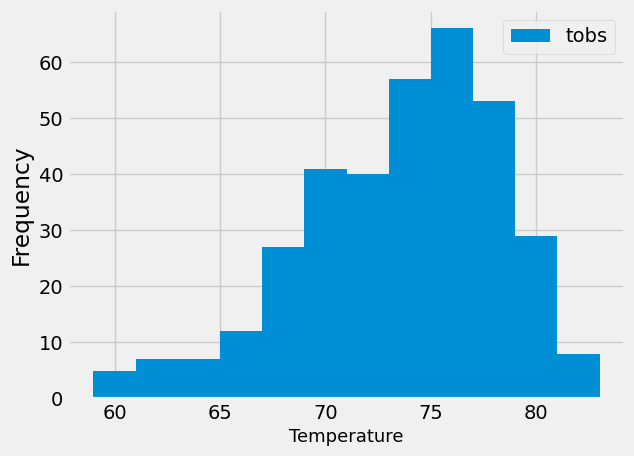

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_results = session.query(Measurement.tobs).\
       filter(Measurement.station == 'USC00519281').\
       filter(Measurement.date >= '2016-08-23').order_by(Measurement.date)

station_temp = pd.DataFrame(station_results, columns=['tobs'])
station_temp.plot.hist(bins=12)
plt.xlabel("Temperature", size = 13)
plt.ylabel("Frequency")

plt.show()

# Close Session

In [18]:
# Close Session
session.close()